# Problem Statement:
## A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
## Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
# imoprt necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# imoprt dataset
data = pd.read_csv("C:/Users/Vishal Pawar/Downloads/Fraud_check.csv")

In [3]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
# Renamning the data
data2 = data.rename({'Marital.Status':'Maritial_status','Taxable.Income':'Taxable_income','City.Population':'City_population','Work.Experience':'Work_experience'},axis = 1)
data2

,Undergrad,Maritial_status,Taxable_income,City_population,Work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
# using one_hot encoding
data2['Undergrad'] = data2['Undergrad'].map({'NO':0,'YES':1})
data2['Maritial_status'] = data2['Maritial_status'].map({'Single':1,'Divorced':0,'Married':2})
data2['Urban'] = data2['Urban'].map({'YES':1,'NO':0})

In [6]:
data2.head()

,Undergrad,Maritial_status,Taxable_income,City_population,Work_experience,Urban
0,0,1,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,2,36925,160205,30,1
3,1,1,50190,193264,15,1
4,0,2,81002,27533,28,0


In [7]:
# COnverting numeric data to catogerical data as mentioned in the problem statement
data2["taxable_income"]="GOOD"
data2.loc[data2["Taxable_income"]<=30000,"taxable_income"]="Risky"
data2.drop(['Taxable_income'],axis = 1,inplace = True)

In [8]:
# cheking if data is converted or not
data2[data2.taxable_income == 'Risky']

,Undergrad,Maritial_status,City_population,Work_experience,Urban,taxable_income
10,0,1,102602,19,1,Risky
12,0,0,148033,14,1,Risky
16,1,0,34551,29,0,Risky
19,0,1,126953,30,1,Risky
21,1,0,29106,7,1,Risky
...,...,...,...,...,...,...
544,0,1,133877,21,1,Risky
557,1,2,157421,10,0,Risky
567,1,1,129912,30,0,Risky
575,0,0,95975,13,1,Risky


In [9]:
# cheking if column is converted or not
data2[data2.taxable_income == 'GOOD']

,Undergrad,Maritial_status,City_population,Work_experience,Urban,taxable_income
0,0,1,50047,10,1,GOOD
1,1,0,134075,18,1,GOOD
2,0,2,160205,30,1,GOOD
3,1,1,193264,15,1,GOOD
4,0,2,27533,28,0,GOOD
...,...,...,...,...,...,...
595,1,0,39492,7,1,GOOD
596,1,0,55369,2,1,GOOD
597,0,0,154058,0,1,GOOD
598,1,2,180083,17,0,GOOD


In [10]:
# input variables
X = data2.iloc[:,0:5]
X

,Undergrad,Maritial_status,City_population,Work_experience,Urban
0,0,1,50047,10,1
1,1,0,134075,18,1
2,0,2,160205,30,1
3,1,1,193264,15,1
4,0,2,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,2,180083,17,0


In [11]:
# Target variable
Y = data2.iloc[:,5]
Y

0      GOOD
1      GOOD
2      GOOD
3      GOOD
4      GOOD
       ... 
595    GOOD
596    GOOD
597    GOOD
598    GOOD
599    GOOD
Name: taxable_income, Length: 600, dtype: object

In [12]:
# Splitting the data ino train and test split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 40)

In [13]:
# building model buildling DecisionTree
modelDT = DecisionTreeClassifier(criterion = 'gini',max_depth = 7)
modelDT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

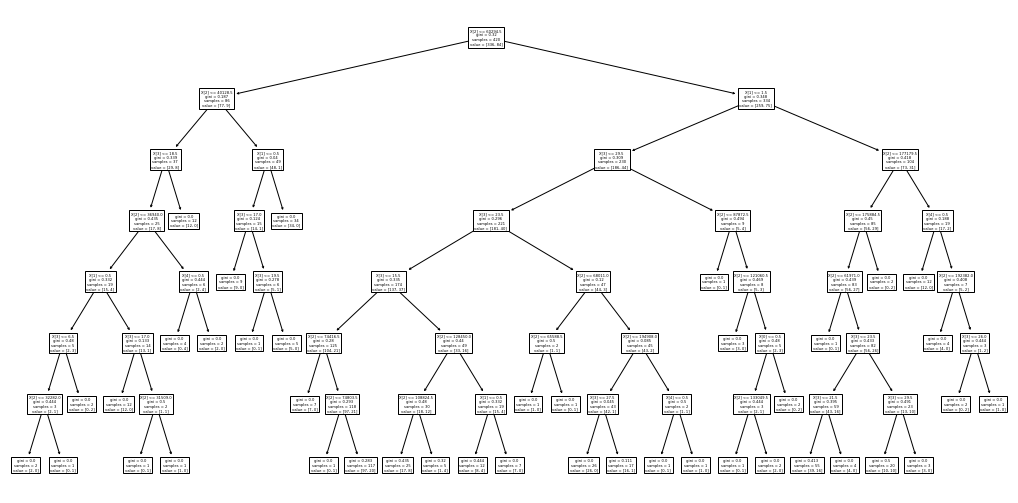

In [14]:
# Plotting tree
fig = plt.figure(figsize = (18,9))
tree.plot_tree(modelDT)
plt.show()

In [15]:
# Predicting on test dataset
preds = modelDT.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

GOOD     174
Risky      6
dtype: int64

In [16]:
preds

array(['GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'Risky', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'Risky', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'Risky', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'GOOD', 'Risky', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'Risky', 'Risky', 'GOOD', 'GOOD', 'GOOD',


In [17]:
# accurecy of a model
np.mean(preds==y_test)*100

75.55555555555556

In [18]:
df_t = pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df_t

,Actual,Predicted
159,GOOD,GOOD
307,GOOD,GOOD
253,GOOD,GOOD
528,GOOD,GOOD
137,Risky,GOOD
...,...,...
221,GOOD,GOOD
390,GOOD,GOOD
530,GOOD,GOOD
232,Risky,GOOD


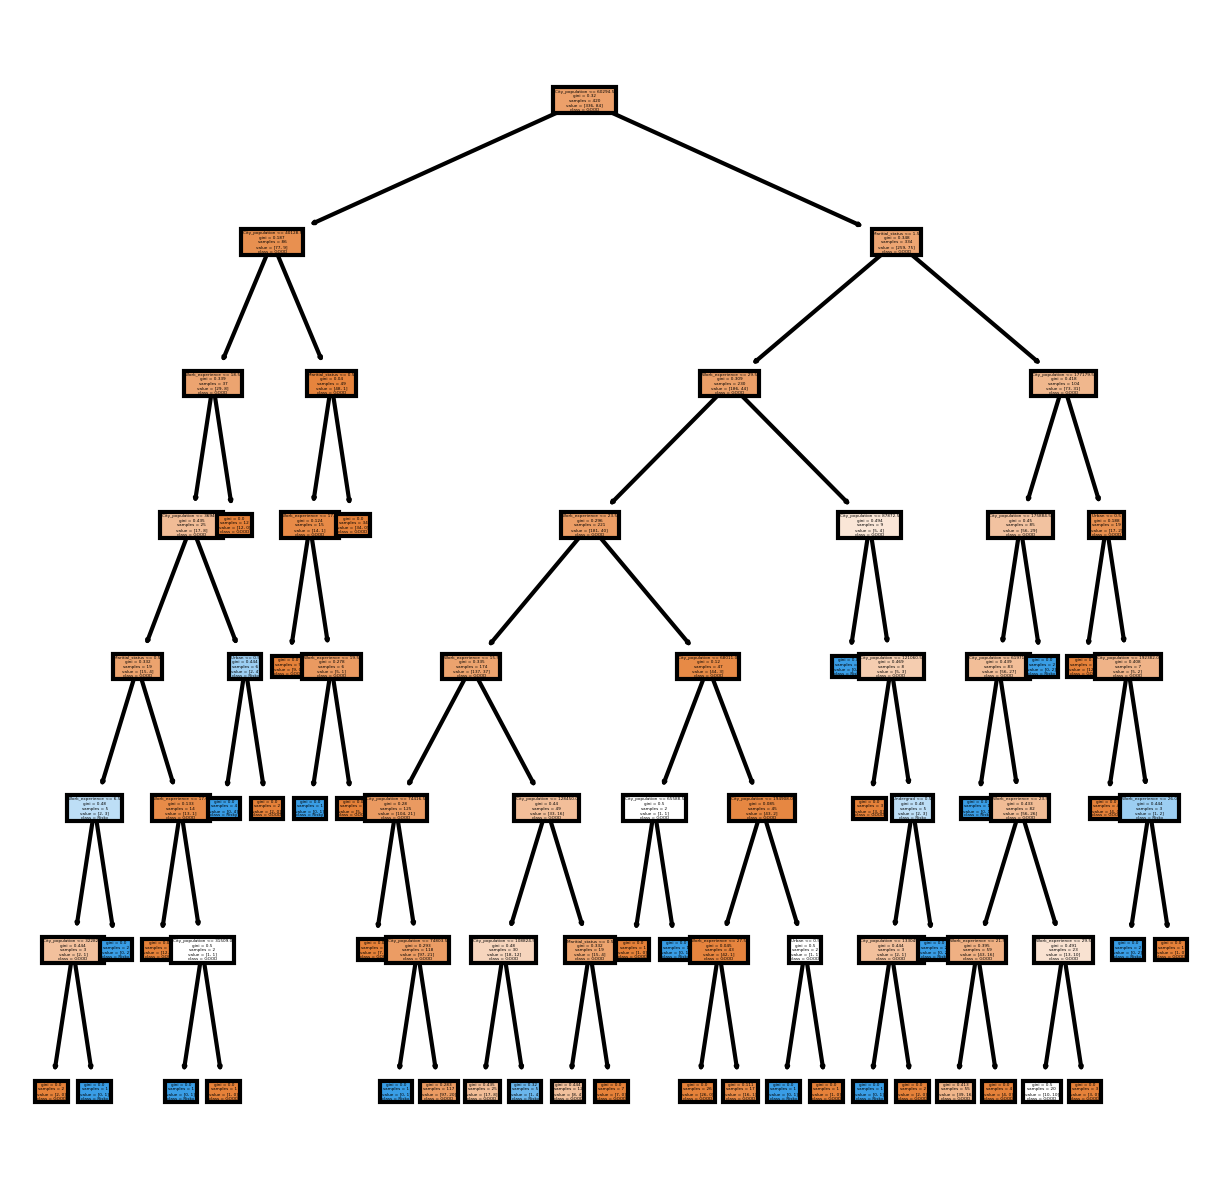

In [19]:
fn = ['Undergrad','Maritial_status','City_population','Work_experience','Urban']
cn = ['GOOD','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(modelDT,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [20]:
modelDT.feature_importances_

array([0.0218351 , 0.09757294, 0.49832815, 0.29243003, 0.08983378])

In [21]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': modelDT.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
2,City_population,0.498328
3,Work_experience,0.292430
1,Maritial_status,0.097573
4,Urban,0.089834
0,Undergrad,0.021835
